In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('customer_churn.csv')
df.head(5)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#total charges should be float but here is flat,thats why replacing blanks with 0

In [13]:
df["TotalCharges "]=df["TotalCharges"].replace(" ","0" )
df["TotalCharges "]=df["TotalCharges "].astype("float")

In [18]:
df.isnull().sum().sum()

np.int64(0)

In [19]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [22]:
df["customerID"].duplicated().sum()

np.int64(0)

#converting seniorcitizen row from 0/1 to no/yes

In [23]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df["SeniorCitizen"]=df["SeniorCitizen"].apply(conv)

Text(0.5, 1.0, 'Churn Distribution')

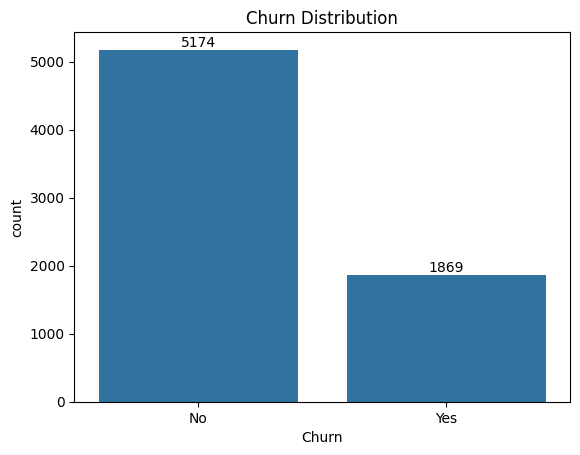

In [41]:
ax=sns.countplot(x="Churn",data=df)
ax.bar_label(ax.containers[0])
plt.title("Churn Distribution")

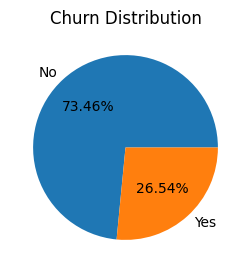

In [60]:
plt.figure(figsize=(3,3))
gb=df.groupby("Churn").agg({"Churn":"count"})
gb
plt.pie(gb['Churn'],labels=gb.index,autopct='%1.2f%%')
plt.title("Churn Distribution")
plt.show()

#from the chart we can conculude that 26.55% of our coustomer have churned out
# now lets see the reason behind that 

Text(0.5, 1.0, 'churned customers ,gender wise')

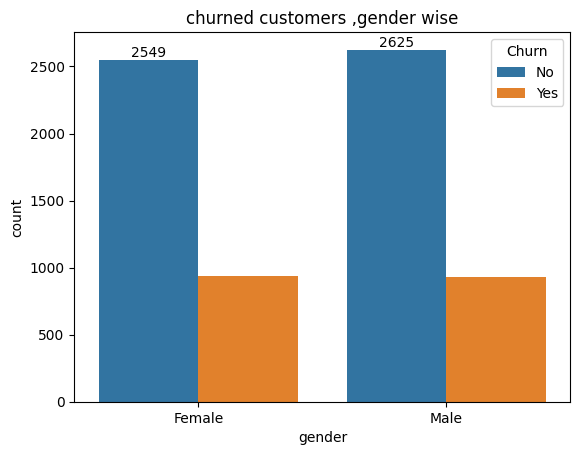

In [66]:
x=sns.countplot(x="gender",data=df,hue="Churn")
x.bar_label(x.containers[0])
plt.title("churned customers ,gender wise")

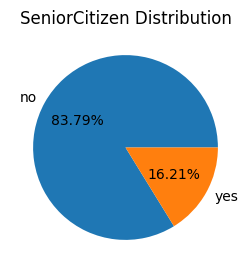

In [73]:
plt.figure(figsize=(3,3))
gb=df.groupby("SeniorCitizen").agg({"SeniorCitizen":"count"})
gb
plt.pie(gb['SeniorCitizen'],labels=gb.index,autopct='%1.2f%%')
plt.title("SeniorCitizen Distribution")
plt.show()

#from this we can conculude that approx equal no. of churing happening,so it is not gender specific

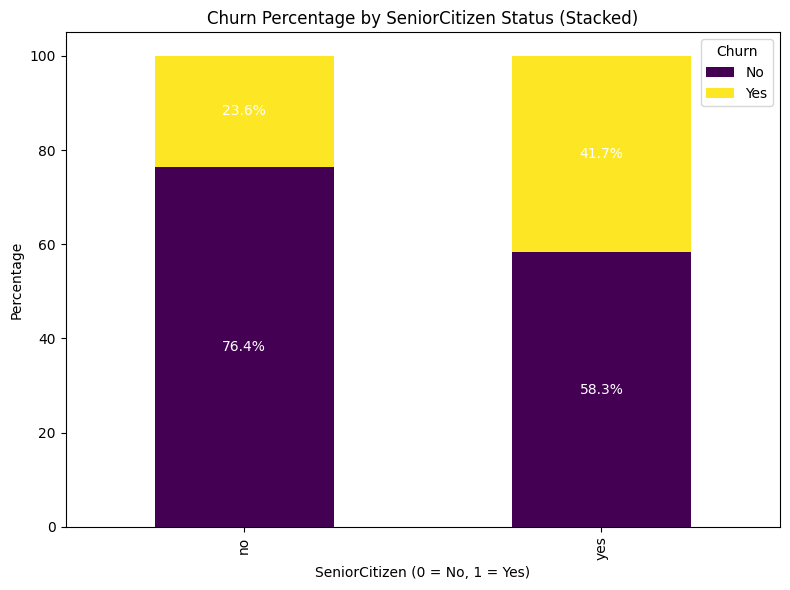

In [72]:


import pandas as pd
import matplotlib.pyplot as plt

# Create a crosstab of SeniorCitizen vs Churn
import pandas as pd
import matplotlib.pyplot as plt

# Crosstab with normalized values (percentages)
ct = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100

# Plot
ax = ct.plot(kind='bar', stacked=True, figsize=(8,6), colormap='viridis')

# Add percentage labels
for idx, (i, row) in enumerate(ct.iterrows()):
    cumulative = 0
    for j, value in enumerate(row):
        ax.text(x=idx, 
                y=cumulative + value / 2, 
                s=f'{value:.1f}%', 
                ha='center', 
                va='center', 
                color='white', 
                fontsize=10)
        cumulative += value

# Titles and labels
plt.title("Churn Percentage by SeniorCitizen Status (Stacked)")
plt.xlabel("SeniorCitizen (0 = No, 1 = Yes)")
plt.ylabel("Percentage")
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


# a greater percentage 41.7 percentage of senior citizen have churned out

Text(0.5, 1.0, 'Tenure Distribution')

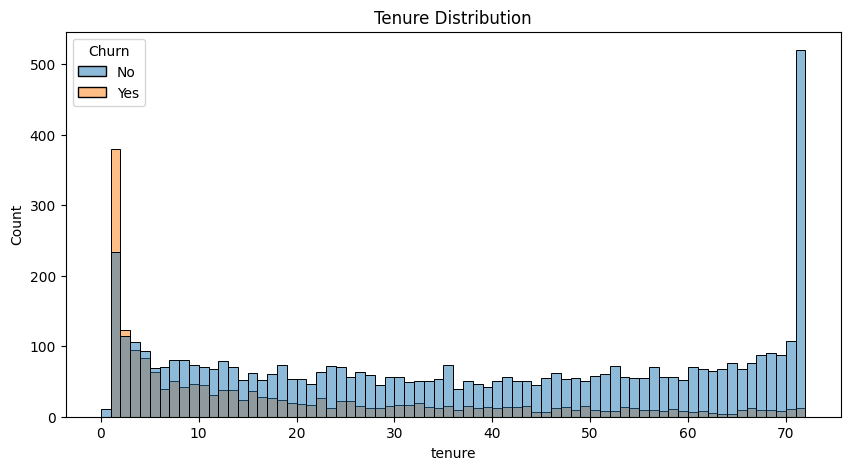

In [78]:
plt.figure(figsize=(10,5))
sns.histplot(x="tenure",data=df,hue="Churn",bins=72)
plt.title("Tenure Distribution")

#people who have used our services long time have styed and people who have usedservices for 1 or two month have churned

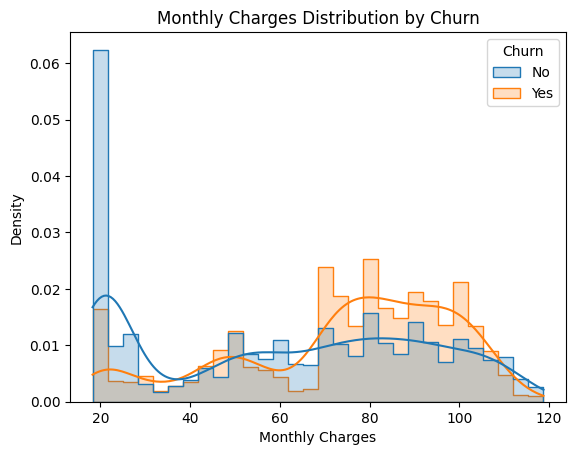

In [82]:
sns.histplot(data=df, x="MonthlyCharges", hue="Churn", bins=30, kde=True, element="step", stat="density", common_norm=False)
plt.title("Monthly Charges Distribution by Churn")
plt.xlabel("Monthly Charges")
plt.ylabel("Density")
plt.show()

#graphs shows that coustomers whose monthly charges excedded 70 have churned out

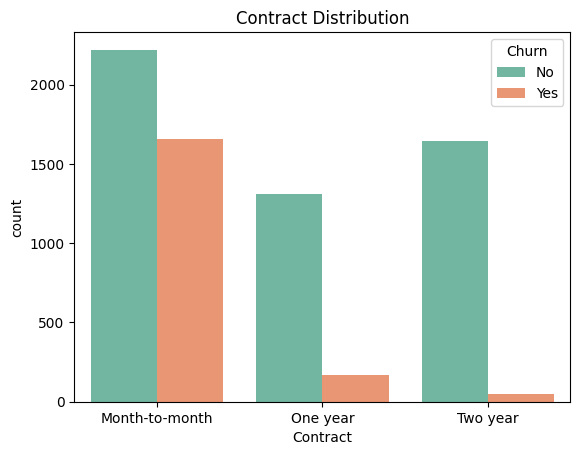

In [86]:
sns.countplot(x="Contract",data=df,hue="Churn",palette="Set2")
plt.title("Contract Distribution")
plt.show()

#so we can see that coustomers who have yearly contract have less no. of churned and coustomers who have monthly contract have quited more in no.

In [89]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'PaymentMethod ', 'TotalCharges '],
      dtype='object')

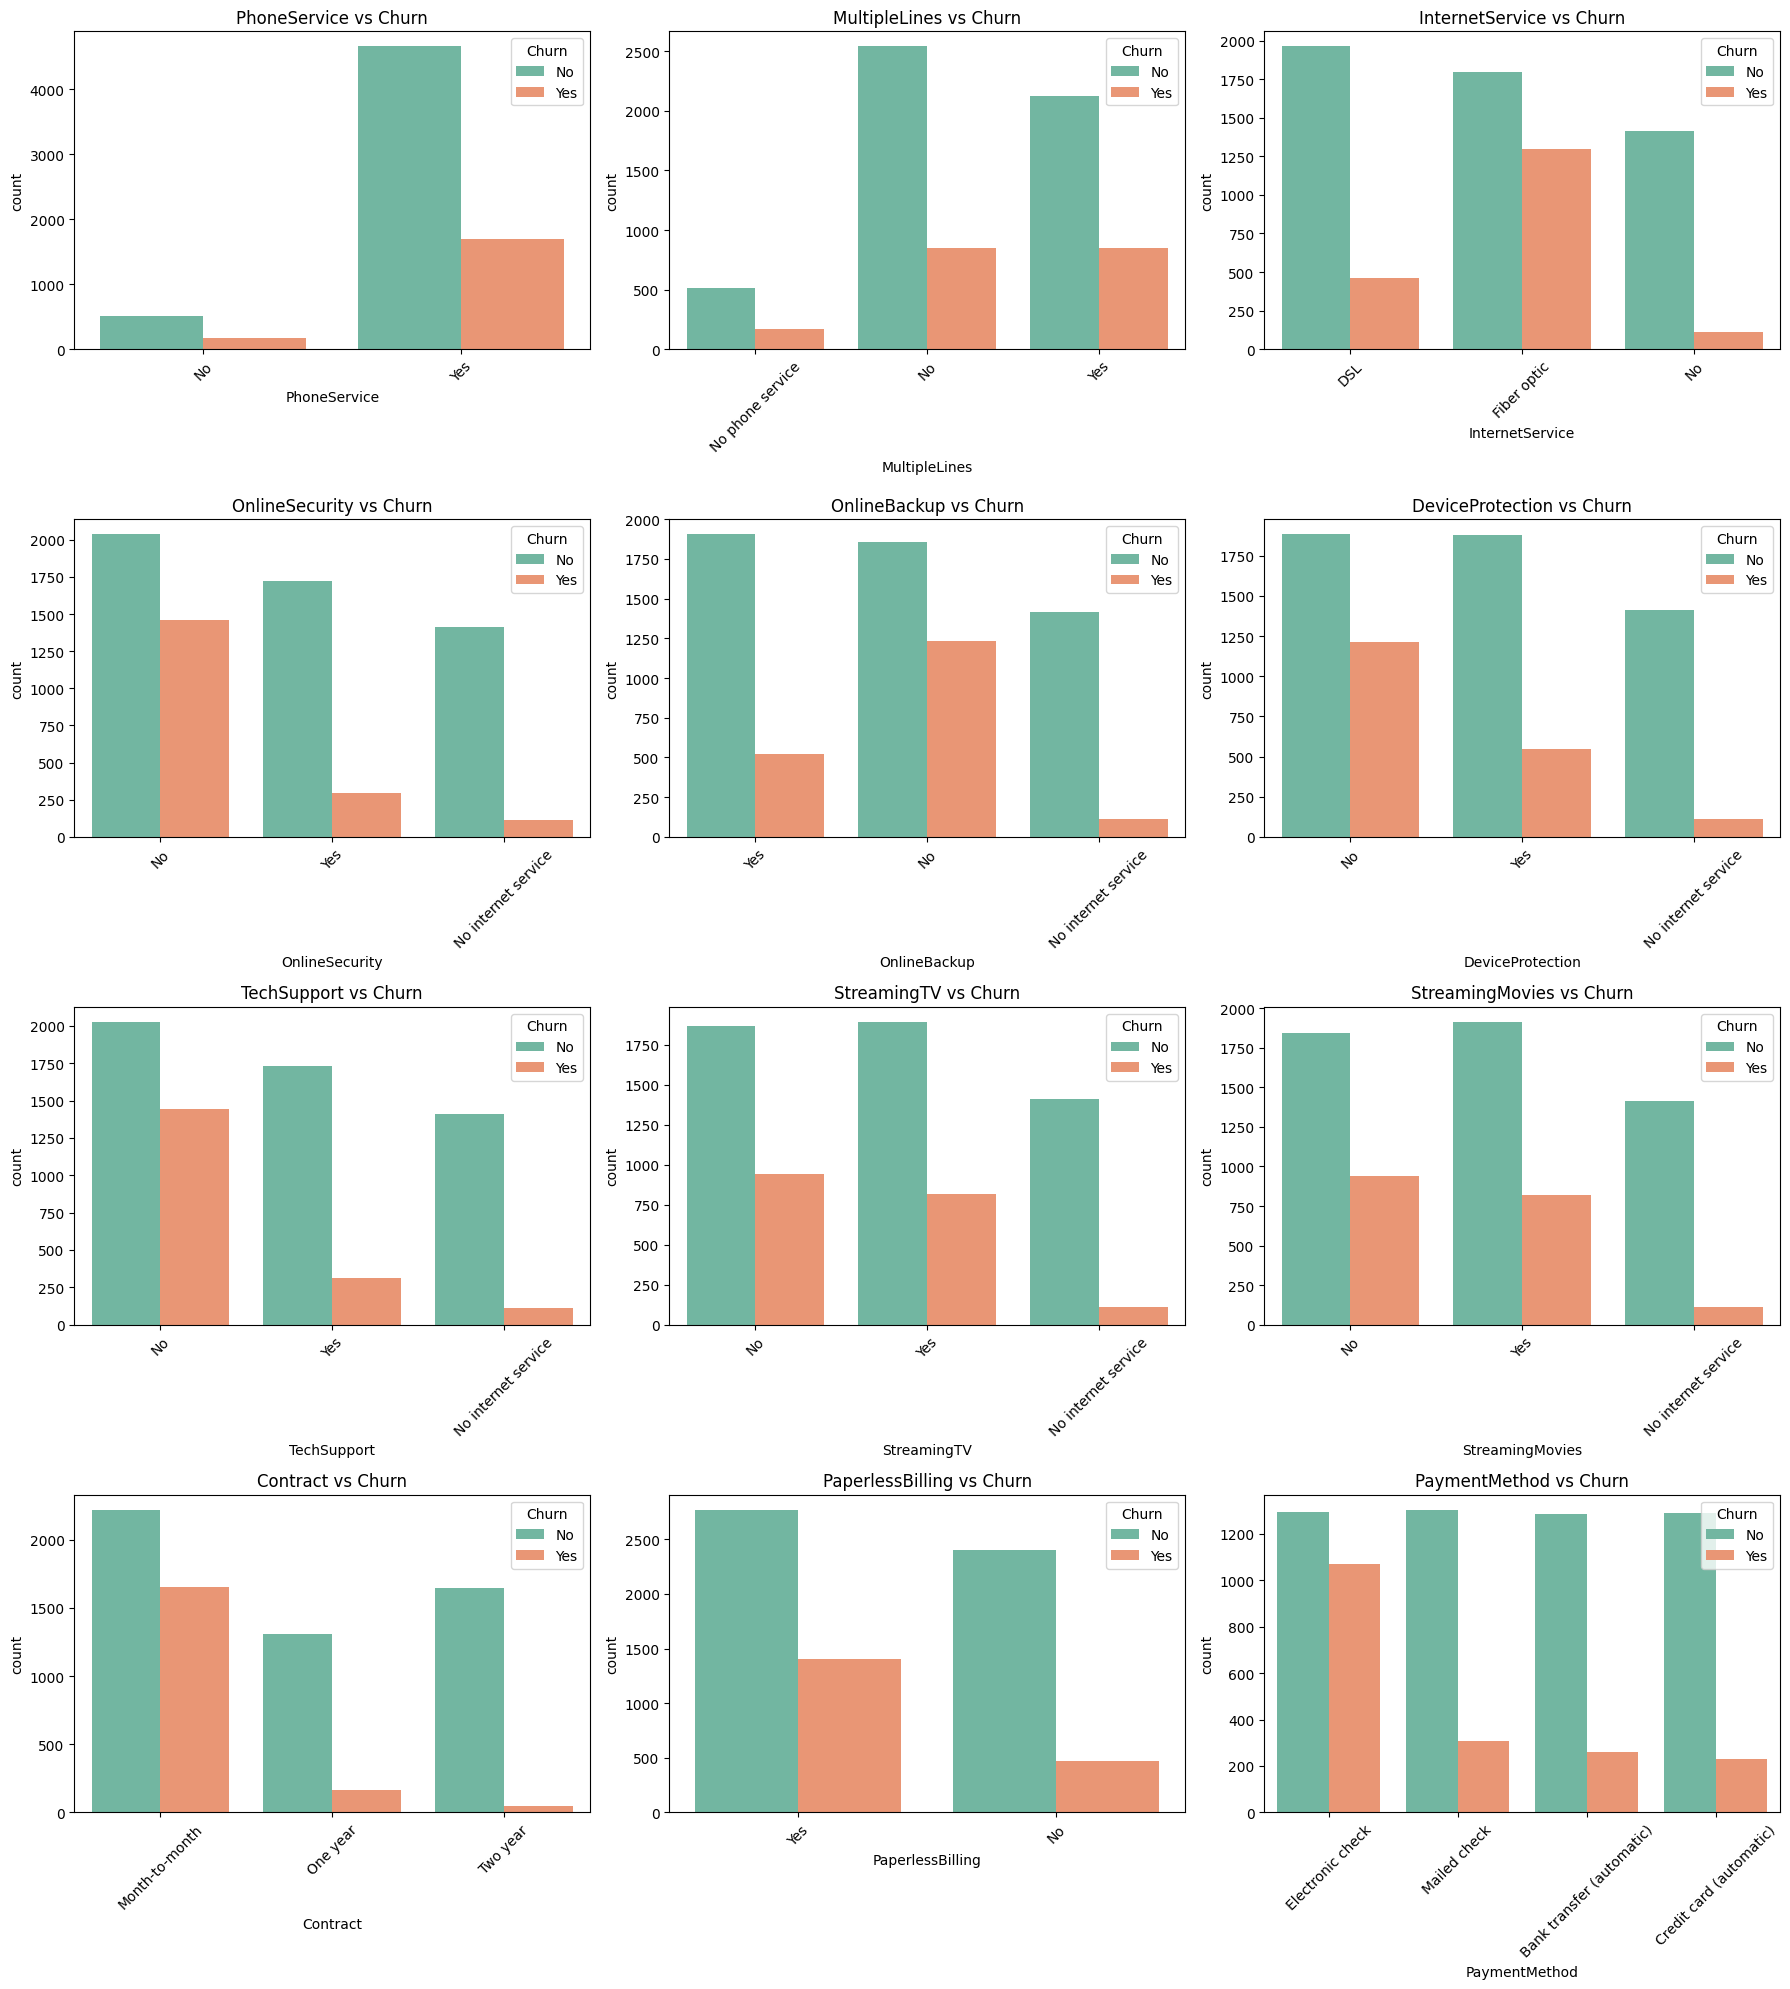

In [91]:


# List of categorical columns
cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
        'PaymentMethod']

# Set the layout
n_cols = 3  # 3 plots per row
n_rows = -(-len(cols) // n_cols)  # Ceiling division

# Set figure size based on number of plots
plt.figure(figsize=(18, 5 * n_rows))

# Loop through and create subplots
for idx, col in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.countplot(data=df, x=col, hue="Churn", palette="Set2")
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()


#Customers on month-to-month contracts, using electronic checks, and lacking services like tech support, online security, or backup are more likely to churn. In contrast, those with 2-year contracts and support features show much lower churn. The analysis highlights the impact of service engagement and billing method on customer retention.


([0, 1, 2, 3],
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Mailed check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

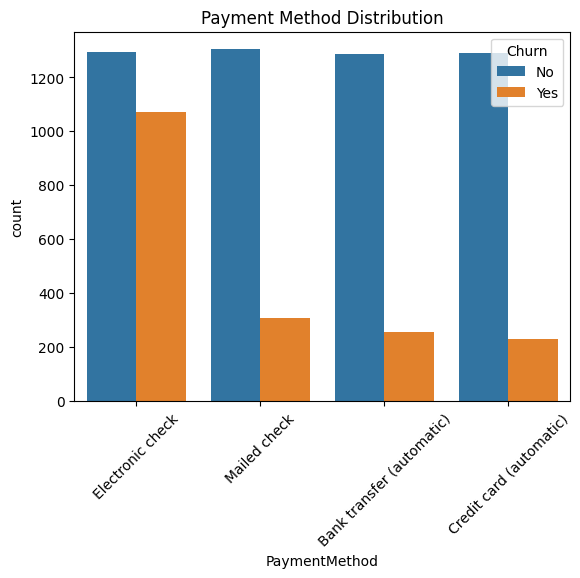

In [6]:
sns.countplot(x="PaymentMethod",data=df,hue="Churn",)
plt.title("Payment Method Distribution")
plt.xticks(rotation=45)

#coustomer who have electronic check payment method have more likely to churn